# TEMAS:
## 1. Tema 9. Análisis de componentes principales
## 2. Tema 10. Análisis Factorial

## Tema 9. Análisis de componentes principales

In [1]:
#IMPORTAMOS LAS LIBRERIAS NECESARIAS 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math
import os
import scipy.stats as stats#Para calculo de probabilidades estadisticos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA#Para descomposición de varianza en el PCA
from sklearn.preprocessing import MinMaxScaler#Para la normalización de datos

In [2]:
os.chdir("E:\PYTHOM\MODULO 1\CLASE 5")

In [3]:
#importamos el archivo csv
fichero_csv="data_credit.csv"#Creamos el objeto para llamar a mi archivo csv
df=pd.read_csv(fichero_csv,#lo ponemos en tablas(DataFrame)
              sep=",", encoding="ISO-8859-1")
df.head()

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab,customer
0,6.0,5.0,4.0,1169.0,0.0,4.0,4.0,3.0,4.0,1.0,67.0,2.0,2.0,3.0,1.0,1.0
1,48.0,3.0,4.0,5951.0,1.0,2.0,2.0,2.0,2.0,1.0,22.0,2.0,1.0,3.0,1.0,2.0
2,12.0,5.0,7.0,2096.0,1.0,3.0,2.0,3.0,3.0,1.0,49.0,2.0,1.0,2.0,2.0,1.0
3,42.0,3.0,3.0,7882.0,1.0,3.0,2.0,3.0,4.0,2.0,45.0,3.0,1.0,3.0,2.0,1.0
4,24.0,4.0,1.0,4870.0,1.0,2.0,3.0,3.0,4.0,4.0,53.0,3.0,2.0,3.0,2.0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  1000 non-null   float64
 1   chist     1000 non-null   float64
 2   reason    1000 non-null   float64
 3   camt      1000 non-null   float64
 4   telephne  1000 non-null   float64
 5   lenemp    1000 non-null   float64
 6   instrate  1000 non-null   float64
 7   perstat   1000 non-null   float64
 8   residlen  1000 non-null   float64
 9   prpownr   1000 non-null   float64
 10  age       1000 non-null   float64
 11  housng    1000 non-null   float64
 12  numcred   1000 non-null   float64
 13  emptype   1000 non-null   float64
 14  numliab   1000 non-null   float64
 15  customer  1000 non-null   float64
dtypes: float64(16)
memory usage: 125.1 KB


In [5]:
#Particionamiento de datos
x = df.iloc[:, 0:len(df.columns)-1].values
y = df.iloc[:, -1].values

#Dividimos un conjunto de prueba y de testeo en 70%,30%
xtrain, xtest, ytrain, ytest =\
    train_test_split(x, #valores de los predictores
                     y, #los valores del target
                     test_size=0.3, #proporción para datos de testeo
                     random_state=0, #semilla
                     stratify=y) #la variable de estratificación

In [6]:
#Normalización: Instancia MinMaxScaler
mms= MinMaxScaler()

In [7]:
xtrain_norm=mms.fit_transform(xtrain)
xtrain_norm

array([[0.35714286, 1.        , 0.        , ..., 0.33333333, 0.66666667,
        0.        ],
       [0.25      , 1.        , 0.        , ..., 0.66666667, 0.66666667,
        0.        ],
       [0.35714286, 0.5       , 0.0625    , ..., 0.        , 0.66666667,
        0.        ],
       ...,
       [0.14285714, 1.        , 0.09375   , ..., 0.33333333, 0.66666667,
        0.        ],
       [0.35714286, 1.        , 0.0625    , ..., 0.33333333, 0.66666667,
        0.        ],
       [0.19642857, 0.5       , 0.125     , ..., 0.33333333, 0.66666667,
        0.        ]])

### paso 1: Escalamiento de las variables

In [8]:
#Estandarización: Instancia StandardScaler
sc=StandardScaler()

In [9]:
xtrain_std=sc.fit_transform(xtrain)
xtrain_std

array([[ 0.27343075,  1.37780319, -0.74440637, ...,  0.98683239,
         0.14707181, -0.44567941],
       [-0.24178197,  1.37780319, -0.74440637, ...,  2.67992717,
         0.14707181, -0.44567941],
       [ 0.27343075, -0.50224015, -0.27601584, ..., -0.7062624 ,
         0.14707181, -0.44567941],
       ...,
       [-0.75699468,  1.37780319, -0.04182058, ...,  0.98683239,
         0.14707181, -0.44567941],
       [ 0.27343075,  1.37780319, -0.27601584, ...,  0.98683239,
         0.14707181, -0.44567941],
       [-0.49938833, -0.50224015,  0.19237468, ...,  0.98683239,
         0.14707181, -0.44567941]])

In [10]:
#Con lo aprendido de Xtrain debemos realizar la transformacion para eñ xtest
xtest_std=sc.transform(xtest)
xtest_std

array([[ 3.36470705, -0.50224015, -0.04182058, ..., -0.7062624 ,
         0.14707181, -0.44567941],
       [ 0.27343075, -0.50224015, -0.51021111, ..., -0.7062624 ,
         1.66104633, -0.44567941],
       [ 0.27343075, -0.50224015, -0.04182058, ..., -0.7062624 ,
         0.14707181, -0.44567941],
       ...,
       [-1.10046983, -0.50224015, -0.04182058, ..., -0.7062624 ,
        -1.36690271, -0.44567941],
       [ 0.27343075,  1.37780319, -0.04182058, ...,  0.98683239,
        -1.36690271, -0.44567941],
       [-1.2722074 , -0.50224015, -0.04182058, ..., -0.7062624 ,
         1.66104633, -0.44567941]])

In [11]:
df_std=pd.DataFrame(xtrain_std,
                   columns=["duration","chist","reason", "camt", "telephne",
                                         "lenemp","instrate","perstat", "residlen", "prpownr",
                                         "age","housng","numcred","emptype","numliab"])
df_std.head()

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab
0,0.273431,1.377803,-0.744406,-0.277224,-1.199593,0.228874,0.933475,1.851752,0.121235,-0.339904,-0.769416,0.132827,0.986832,0.147072,-0.445679
1,-0.241782,1.377803,-0.744406,0.276215,-1.199593,1.063310,-1.759240,-0.997097,1.033756,-1.287844,-0.250958,-1.726746,2.679927,0.147072,-0.445679
2,0.273431,-0.502240,-0.276016,1.658889,-1.199593,-1.439999,-1.759240,-0.997097,-0.791286,-0.339904,-0.510187,0.132827,-0.706262,0.147072,-0.445679
3,0.273431,-2.382283,1.363351,0.377476,-1.199593,-0.605562,-1.759240,0.427327,1.033756,-1.287844,0.008271,0.132827,2.679927,-1.366903,-0.445679
4,0.273431,-0.502240,-0.744406,-0.641395,-1.199593,-1.439999,0.933475,1.851752,0.121235,-1.287844,-0.250958,0.132827,-0.706262,0.147072,-0.445679


### paso 2: Prueba de Hipótesis(Correlacion de Variables)

In [12]:
df_corr=df_std.corr(method="pearson")
df_corr

,duration,chist,reason,camt,telephne,lenemp,instrate,perstat,residlen,prpownr,age,housng,numcred,emptype,numliab
duration,1.000000,-0.076000,0.171482,0.615645,-0.180049,0.099967,0.106123,0.003897,0.041850,0.314577,-0.018861,0.153928,-0.007308,0.252479,0.001114
chist,-0.076000,1.000000,-0.086105,-0.060558,-0.020915,0.130637,0.019237,0.048204,0.013098,-0.063783,0.154075,0.081694,0.436512,0.025071,0.028976
reason,0.171482,-0.086105,1.000000,0.141879,-0.116151,0.024089,0.023723,-0.007387,0.006902,0.055240,0.037755,0.094522,0.074690,0.034516,0.009255
camt,0.615645,-0.060558,0.141879,1.000000,-0.301887,0.088360,-0.279371,-0.026608,0.027859,0.300961,0.050640,0.126361,0.038134,0.282926,0.044728
telephne,-0.180049,-0.020915,-0.116151,-0.301887,1.000000,-0.137472,-0.006466,0.007861,-0.087811,-0.192984,-0.125610,-0.126930,-0.065308,-0.373257,-0.019061
lenemp,0.099967,0.130637,0.024089,0.088360,-0.137472,1.000000,0.052770,0.060109,0.295321,0.181755,0.359757,0.215654,0.115225,0.139594,0.050709
instrate,0.106123,0.019237,0.023723,-0.279371,-0.006466,0.052770,1.000000,0.149039,0.058831,0.015850,0.040698,0.052457,0.044896,0.113138,-0.059866
perstat,0.003897,0.048204,-0.007387,-0.026608,0.007861,0.060109,0.149039,1.000000,0.005756,-0.010995,0.000158,0.105953,0.060637,-0.010475,0.113833
residlen,0.041850,0.013098,0.006902,0.027859,-0.087811,0.295321,0.058831,0.005756,1.000000,0.131417,0.265400,0.054197,0.061345,-0.011909,0.061044
prpownr,0.314577,-0.063783,0.055240,0.300961,-0.192984,0.181755,0.015850,-0.010995,0.131417,1.000000,0.058511,0.354891,-0.019954,0.277565,0.026972


### Prueba de esferacidad de Bartlet

con un alpha igual a 0.01:

- H0= p-valor>0.01 - las varaibles no están correlacionadas.
- H1= p-valor<0.01 - Las variables sí están correlacionadas.

In [13]:
#indentity = np.identity(10)
n = df_std.shape[0] #número de observaciones
p = df_std.shape[1] #número de columnas

In [14]:
chi2 = -(n-1-(2*p+5)/6)*math.log(np.linalg.det(df_corr))

In [15]:
chi2

1570.825700088011

In [16]:
ddl = p*(p-1)/2

In [17]:
ddl

105.0

In [18]:
pvalue = stats.chi2.pdf(chi2,ddl)
pvalue

4.4508973687542834e-260

### Paso 3: Análisis de Componentes Principales

In [19]:
#Crear una Instancia de la clase PCA
pca=PCA()#Inicialmente hay tantos CPs como variables originales

In [20]:
xtrain_pca=pca.fit_transform(xtrain_std)

In [21]:
#Analizando Variabilidad
VarianzaExplicada=pca.explained_variance_ratio_
VarianzaExplicada

array([0.17347063, 0.12340491, 0.08593334, 0.08227581, 0.07565657,
       0.06826758, 0.0630236 , 0.06136587, 0.05401719, 0.04907728,
       0.0439161 , 0.03688589, 0.03465738, 0.03115123, 0.01689663])

In [22]:
VarianzaAcomulada=np.cumsum(pca.explained_variance_ratio_)
VarianzaAcomulada

array([0.17347063, 0.29687554, 0.38280888, 0.46508469, 0.54074126,
       0.60900884, 0.67203244, 0.73339831, 0.7874155 , 0.83649278,
       0.88040888, 0.91729476, 0.95195214, 0.98310337, 1.        ])

In [23]:
#Analizando Autovalores
cov_mat=np.cov(xtrain_std.T)

In [24]:
AutoValores,AutoVectores=np.linalg.eig(cov_mat)
print(AutoValores)

[2.60578196 1.85372185 0.25381197 1.29084417 1.23590266 1.13647209
 1.02547872 0.94670645 0.92180491 0.81141704 0.73721234 0.65968383
 0.46793695 0.52060445 0.55407982]


In [25]:
(AutoValores>1).sum()

6

In [26]:
cpl=AutoValores[0]/sum(AutoValores)
cpl

0.17347062756722426

In [27]:
#Una forma alternativa
sorted(AutoValores,reverse=True)/sum(AutoValores)

array([0.17347063, 0.12340491, 0.08593334, 0.08227581, 0.07565657,
       0.06826758, 0.0630236 , 0.06136587, 0.05401719, 0.04907728,
       0.0439161 , 0.03688589, 0.03465738, 0.03115123, 0.01689663])

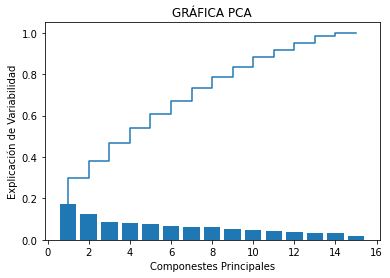

In [28]:
plt.bar(range(1, 16), VarianzaExplicada)
plt.step(range(1, 16), VarianzaAcomulada)
plt.ylabel('Explicación de Variabilidad')
plt.xlabel('Componestes Principales')
plt.title("GRÁFICA PCA")
plt.show()

##### Generacion de Numero de componentes principales

In [29]:
pca = PCA(n_components=6) #n_components es el número de componentes que nos indicó Kaiser
#fit_transform:ajuste el modelo con X y la reducción de dimensionalidad en X.
X_std = pca.fit_transform(xtrain_std)

In [30]:
df_x =pd.DataFrame(X_std)
df_x.columns = ['PC1', 'PC2','PC3','PC4', 'PC5','PC6']
df_x.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.357958,1.107804,-0.894869,-2.109526,0.172859,-0.553757
1,-0.036130,1.374380,-3.014144,1.105057,-2.313433,0.418935
2,0.235394,-2.478637,-1.244102,1.296728,-0.449891,-0.675197
3,0.071459,-0.197860,-1.056150,1.563974,0.717678,2.345540
4,-0.765311,-0.414793,0.667308,-1.717680,0.566614,-0.350221


In [31]:
df_y = pd.DataFrame(ytrain)
df_y.columns = ['customer']
df_y.head()

,customer
0,1.0
1,2.0
2,1.0
3,2.0
4,1.0


##### Nuevo conjunto de datos

In [32]:
df_rd = pd.concat([df_x, df_y], axis=1)
df_rd.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,customer
0,0.357958,1.107804,-0.894869,-2.109526,0.172859,-0.553757,1.0
1,-0.036130,1.374380,-3.014144,1.105057,-2.313433,0.418935,2.0
2,0.235394,-2.478637,-1.244102,1.296728,-0.449891,-0.675197,1.0
3,0.071459,-0.197860,-1.056150,1.563974,0.717678,2.345540,2.0
4,-0.765311,-0.414793,0.667308,-1.717680,0.566614,-0.350221,1.0
5,0.697097,-0.596313,2.116030,-0.464408,0.083032,0.387817,2.0
6,-0.488380,1.573986,-0.216953,-0.525241,-1.227563,-0.261965,1.0
7,-0.444082,-1.067414,1.180356,-0.938877,-0.241765,0.542838,1.0
8,2.047943,0.365126,2.088276,-0.651831,-0.242252,-0.788406,1.0
9,-2.583473,-0.380457,0.404785,0.411982,-0.091772,0.307833,2.0


In [33]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1       700 non-null    float64
 1   PC2       700 non-null    float64
 2   PC3       700 non-null    float64
 3   PC4       700 non-null    float64
 4   PC5       700 non-null    float64
 5   PC6       700 non-null    float64
 6   customer  700 non-null    float64
dtypes: float64(7)
memory usage: 38.4 KB


## Tema 10. Análisis Factorial

In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as math
import os
import scipy.stats as stats#Para calculo de probabilidades estadisticos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis#Para descomposición de varianza en el PCA
from sklearn.preprocessing import MinMaxScaler#Para la normalización de datos


In [35]:
os.chdir(r"E:\PYTHOM\MODULO 1\CLASE 5")

In [36]:
url="wine.data"
df_wine = pd.read_csv(url,header=None)

# Si el conjunto de datos de Wine no está disponible temporalmente en el repositorio de Machine Learning de la UCI, 
#anule los comentarios de la siguiente línea de código para cargar el conjunto de datos desde una ruta local:

#df_wine = pd.read_csv('D:/Python/1. Nivel I/9/data/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### PARTICIONANDO LOS DATOS

In [37]:
x=df_wine.iloc[:, 1:].values
y=df_wine.iloc[:, 0].values
xtrain, xtest, ytrain, ytest = \
    train_test_split(x, #predictores
                     y, #target
                     test_size=0.3, #tamaño de los datos de testeo 
                     stratify=y, # variable de estratificación
                     random_state=0) #semilla

#### ESCALAMIENTO DE DATOS

In [38]:
sc=StandardScaler()#Nuestra instancia StandardScaler()
xtrain_std=sc.fit_transform(xtrain)#Guarda la media y desviación de xtrain para luego
xtest_std=sc.transform(xtest)

**_Ilustración de Cargas Factoriales, Ejemplo: Data Iris_**

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
x,y=iris.data,iris.target

In [41]:
factor=FactorAnalysis(n_components=4, random_state=2020).fit(x)

In [42]:
#Factores con máxima varianza (carga)
factor.components_

array([[ 0.70698856, -0.15800499,  1.65423609,  0.70084996],
       [ 0.115161  ,  0.15963548, -0.04432109, -0.01403039],
       [-0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , -0.        ]])

**_Cerrando ilustración de cargas factoriales_**

In [43]:
FA= FactorAnalysis()
xtrain_FA = FA.fit(xtrain_std)
xtrain_FA.components_

array([[-2.68398795e-01,  4.78267922e-01, -8.23434764e-02,
         3.89619362e-01, -2.80493395e-01, -8.48027518e-01,
        -8.96695560e-01,  6.10593544e-01, -6.34124632e-01,
         1.77666823e-01, -6.72551278e-01, -7.98880917e-01,
        -5.95473936e-01],
       [ 7.01476029e-01,  1.78412796e-01,  2.63041773e-01,
        -2.28848343e-01,  3.51196978e-01,  7.72534972e-02,
        -1.90598515e-02,  1.00562271e-01,  2.22408351e-02,
         7.52555988e-01, -2.59878489e-01, -3.41463147e-01,
         5.52834465e-01],
       [-7.61801772e-02,  1.62225043e-01,  6.55477450e-01,
         6.00167810e-01,  1.51567033e-01,  1.33712377e-01,
         9.11337260e-02,  1.81671002e-01,  2.64162505e-02,
         2.06370030e-02, -3.92249922e-02,  7.33103165e-02,
        -6.73110647e-02],
       [-4.73323851e-02,  2.70658477e-01, -1.34998350e-01,
        -1.92209263e-02, -1.63701363e-01,  1.18296185e-01,
         7.84306206e-02, -4.09230845e-02,  2.85458651e-01,
         1.14959202e-01, -2.98859200e

In [44]:
FA= FactorAnalysis(n_components=6,random_state=2020)
xtrain_Fact6=FA.fit_transform(xtrain_std)
xtrain_Fact6=pd.DataFrame(xtrain_Fact6,columns=["F1","F2","F3","F4","F5","F6"])
xtrain_Fact6.head()

,F1,F2,F3,F4,F5,F6
0,0.926144,0.438051,-0.298116,-0.832909,0.049138,1.303291
1,-0.827139,1.044580,0.840598,-1.669089,-0.187766,-0.579737
2,-1.157387,0.913191,0.678383,-0.221260,0.421297,-0.492270
3,-0.618607,0.510692,0.416441,-0.365276,1.150223,-0.062673
4,1.562971,0.171224,-0.429065,-0.732824,-1.136277,-1.038941


In [45]:
df_wine_y = pd.DataFrame(ytrain)
df_wine_y.columns = ['Class label']
df_wine_y.head()

,Class label
0,3
1,1
2,1
3,1
4,3


##### Nuevo conjunto de datos

In [46]:
df_wine_rd_fact = pd.concat([xtrain_Fact6, df_wine_y], axis=1)
df_wine_rd_fact.head()

,F1,F2,F3,F4,F5,F6,Class label
0,0.926144,0.438051,-0.298116,-0.832909,0.049138,1.303291,3
1,-0.827139,1.044580,0.840598,-1.669089,-0.187766,-0.579737,1
2,-1.157387,0.913191,0.678383,-0.221260,0.421297,-0.492270,1
3,-0.618607,0.510692,0.416441,-0.365276,1.150223,-0.062673,1
4,1.562971,0.171224,-0.429065,-0.732824,-1.136277,-1.038941,3


## <center> Trabajando con el paquete FACTOR_ANALYZER </center>

In [47]:
pip install factor_analyzer

Note: you may need to restart the kernel to use updated packages.


In [48]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from factor_analyzer import FactorAnalyzer #Ojo es necesario descargar el paquete y colocarlo en una de las direcciones del path
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


In [49]:
from factor_analyzer import FactorAnalyzer

In [50]:
import sys
for a in sys.path:
    a.replace('\\\\','\\')
    print(a)


C:\Users\user
C:\ProgramData\Anaconda3\python38.zip
C:\ProgramData\Anaconda3\DLLs
C:\ProgramData\Anaconda3\lib
C:\ProgramData\Anaconda3

C:\ProgramData\Anaconda3\lib\site-packages
C:\ProgramData\Anaconda3\lib\site-packages\win32
C:\ProgramData\Anaconda3\lib\site-packages\win32\lib
C:\ProgramData\Anaconda3\lib\site-packages\Pythonwin
C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\user\.ipython


In [51]:
#Estableciendo la ruta de trabajo
os.chdir(r"E:\PYTHOM\MODULO 1\CLASE 5")

In [52]:
mifichero="nba_logreg2.csv"
df_nba = pd.read_csv(mifichero,sep=';')
df_nba.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [53]:
#Revisando la estructura de las variables
df_nba.dtypes

Name            object
GP               int64
MIN            float64
PTS            float64
FGM            float64
FGA            float64
FG%            float64
3P Made        float64
3PA            float64
3P%            float64
FTM            float64
FTA            float64
FT%            float64
OREB           float64
DREB           float64
REB            float64
AST            float64
STL            float64
BLK            float64
TOV            float64
TARGET_5Yrs    float64
dtype: object

In [54]:
#Cambiando el tipo de variable para el target
df_nba["TARGET_5Yrs"]=df_nba["TARGET_5Yrs"].astype('int64')
df_nba.shape

(1329, 21)

In [55]:
#Separando las variables continuas
continuas = ['GP','MIN','PTS','FGM','FGA','FG%','3P Made','3PA','3P%','FTM','FTA','FT%','OREB'
            ,'DREB','REB','AST','STL','BLK','TOV']
x = df_nba.loc[:, continuas]
#Separando las variable target
y = df_nba['TARGET_5Yrs']

In [56]:
#Primero creamos los sets de training y testing (70% y 30%)
xtrain,xtest,ytrain,ytest=\
    train_test_split(x,y,test_size=0.3,random_state=2020,stratify=y)

In [57]:
#Estandarizando las variables continuas
std=StandardScaler()
xtrain_std = std.fit_transform(xtrain)
#Aplicamos lo aprendido al conjunto xtest
xtest_std = std.transform(xtest)

In [58]:
#Generación del DataFrame representado con los valores estandarizados de las variables continuas.
df_xtrain_std=pd.DataFrame(xtrain_std,columns=continuas)
df_xtrain_std.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,-1.369180,-0.473598,0.281668,0.208685,0.263477,0.006113,0.926058,0.778757,1.308397,0.082499,0.044399,0.146739,-0.390759,-0.450818,-0.445607,-0.446585,-0.532769,-0.599360,-0.270871
1,0.135673,-0.756214,-0.657948,-0.545126,-0.681972,0.893430,-0.648410,-0.737785,-1.183699,-0.814274,-0.775454,-0.585815,-0.132750,-0.231539,-0.251661,-0.914443,-0.532769,-0.148750,-1.352608
2,1.061737,0.386027,0.236925,0.382642,0.317502,0.367613,-0.385999,-0.453434,-0.099637,-0.017143,0.267995,-1.260536,0.641277,0.207018,0.378664,0.355457,1.159924,0.752471,0.675650
3,0.888100,2.646958,3.726926,3.223928,3.748129,-0.404681,4.599818,4.949247,0.940813,3.669592,3.994597,-0.046039,0.641277,0.426296,0.524124,3.964647,3.578057,-0.148750,4.326515
4,0.540826,2.187707,3.771669,4.151696,3.450988,1.353520,-0.648410,-0.737785,-1.183699,2.872460,3.025680,0.021434,4.253401,3.130731,3.675751,0.622804,2.852617,1.203082,2.298256


In [59]:
#Test de Bartlett.
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_xtrain_std)
chi_square_value, p_value

(38033.226799967095, 0.0)

In [60]:
#KMO (Kaiser-Meyer-Olkin) Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_xtrain_std)
kmo_model

C:\ProgramData\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.8301730535608445

In [61]:
fa = FactorAnalyzer()

In [62]:
# Eligiendo el número de factores
fa.fit(df_xtrain_std)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev.round(2)

array([9.62, 3.86, 1.24, 0.84, 0.75, 0.6 , 0.49, 0.46, 0.4 , 0.25, 0.22,
       0.1 , 0.1 , 0.05, 0.02, 0.01, 0.  , 0.  , 0.  ])

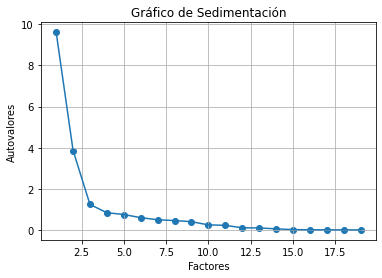

In [63]:
plt.scatter(range(1,df_xtrain_std.shape[1]+1),ev)
plt.plot(range(1,df_xtrain_std.shape[1]+1),ev)
plt.title('Gráfico de Sedimentación')
plt.xlabel('Factores')
plt.ylabel('Autovalores')
plt.grid()
plt.show()

In [64]:
fa.get_factor_variance()

(array([6.02902784, 4.49532876, 2.85470058]),
 array([0.31731725, 0.23659625, 0.1502474 ]),
 array([0.31731725, 0.55391351, 0.7041609 ]))

In [65]:
#Obteniendo la varianza explicada y acumulada de cada factor
varianzaexplicada=fa.get_factor_variance()[1]
varianzaacumulada=fa.get_factor_variance()[2]
varianzaacumulada

array([0.31731725, 0.55391351, 0.7041609 ])

In [66]:
fa3 = FactorAnalyzer(n_factors=3,rotation='varimax')
fa3.fit(df_xtrain_std)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [67]:
fa3.loadings_

array([[ 0.49110272,  0.31081035,  0.02411147],
       [ 0.76678587,  0.50238447,  0.28736697],
       [ 0.78840855,  0.51929642,  0.24672368],
       [ 0.77463524,  0.52647612,  0.19817928],
       [ 0.79641553,  0.43609587,  0.30249976],
       [ 0.06866377,  0.47329078, -0.34331369],
       [ 0.18690583, -0.01781618,  0.95185768],
       [ 0.22114421, -0.04621222,  0.95753801],
       [ 0.14395262, -0.18309674,  0.60540962],
       [ 0.74952955,  0.49949921,  0.06322095],
       [ 0.70911308,  0.56923284, -0.001101  ],
       [ 0.29422179, -0.16070231,  0.29835765],
       [ 0.25450459,  0.8660367 , -0.24243191],
       [ 0.37511309,  0.86021973,  0.00360364],
       [ 0.33584459,  0.91991311, -0.08571163],
       [ 0.8046548 , -0.17945798,  0.21694685],
       [ 0.77620043,  0.12158016,  0.17286253],
       [ 0.10173096,  0.71511725, -0.16269975],
       [ 0.89186266,  0.28376576,  0.10965349]])

In [68]:
#Comunalidades
fa3.get_communalities()

array([0.33836632, 0.9229305 , 0.95212939, 0.91651189, 0.91596341,
       0.34658317, 0.94128424, 0.96791937, 0.42076759, 0.81529089,
       0.8268686 , 0.20140898, 0.87356537, 0.8807008 , 0.96637821,
       0.72674045, 0.64715029, 0.54821308, 0.8879659 ])

In [69]:
#Especifidades
fa3.get_uniquenesses()

array([0.66163368, 0.0770695 , 0.04787061, 0.08348811, 0.08403659,
       0.65341683, 0.05871576, 0.03208063, 0.57923241, 0.18470911,
       0.1731314 , 0.79859102, 0.12643463, 0.1192992 , 0.03362179,
       0.27325955, 0.35284971, 0.45178692, 0.1120341 ])

**_Outliers_**

In [70]:
from sklearn.datasets import load_boston #importar data boston

In [71]:
boston = load_boston () 
x = boston.data #.data para variables predictoras
y = boston.target #.target para variable objetivo
columnas = boston.feature_names #.feature_names para extraer los nombres
#crear el marco de datos 
boston_df = pd.DataFrame (boston.data) 
boston_df.columns = columnas 
boston_df.head ()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### z-score

In [72]:
from scipy import stats
import numpy as np

In [73]:
z = np.abs(stats.zscore(boston_df)) #valor absoluto de las z-score
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Se establece el parámeto (umbral) **k** para considerar una observación como outlier

In [74]:
k = 3
print(np.where(z > k))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Printiamos un ejemplo:

In [75]:
print(z[55])

[0.41899176 3.37503876 1.44695069 0.27259857 1.31039199 1.37389184
 1.65978618 2.33004908 0.52300145 1.08235801 0.2568579  0.4304165
 1.09939185]


In [76]:
print(z[152][3])

3.668397859712425


##### IQR score

El diagrama de caja usa el método IQR (rango intercuartil) para mostrar datos y valores atípicos (forma de los datos) pero para obtener una lista de valores atípicos identificados, necesitaremos usar la fórmula matemática y recuperar los datos atípicos.

**Nota:** Es una medida de la dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a los valores atípicos

In [77]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


Como ahora tenemos los puntajes de IQR, es hora de obtener valores atípicos: **True**

In [78]:
print((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

##### Z-score

Eliminar o filtrar los valores atípicos y obtener los datos limpios. Esto se puede hacer con una sola línea de código, ya que ya hemos calculado el z-score.

In [79]:
boston_df_o = boston_df[(z < 3).all(axis=1)]
boston_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [80]:
len(boston_df_o)

415

In [81]:
len(boston_df)

506

##### IQR score

Al igual que el puntaje Z, podemos usar el puntaje IQR previamente calculado para filtrar los valores atípicos manteniendo solo valores válidos.

In [82]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [83]:
len(boston_df_out)

274

In [84]:
len(boston_df)

506

**_Outliers_**

In [85]:
from sklearn.datasets import load_boston #importar data boston

In [86]:
boston = load_boston () 
x = boston.data #.data para variables predictoras
y = boston.target #.target para variable objetivo
columnas = boston.feature_names #.feature_names para extraer los nombres
#crear el marco de datos 
boston_df = pd.DataFrame (boston.data) 
boston_df.columns = columnas 
boston_df.head ()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##### z-score

In [87]:
from scipy import stats
import numpy as np

In [88]:
z = np.abs(stats.zscore(boston_df)) #valor absoluto de las z-score
print(z)

[[0.41978194 0.28482986 1.2879095  ... 1.45900038 0.44105193 1.0755623 ]
 [0.41733926 0.48772236 0.59338101 ... 0.30309415 0.44105193 0.49243937]
 [0.41734159 0.48772236 0.59338101 ... 0.30309415 0.39642699 1.2087274 ]
 ...
 [0.41344658 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.98304761]
 [0.40776407 0.48772236 0.11573841 ... 1.17646583 0.4032249  0.86530163]
 [0.41500016 0.48772236 0.11573841 ... 1.17646583 0.44105193 0.66905833]]


Se establece el parámeto (umbral) **k** para considerar una observación como outlier

In [89]:
k = 3
print(np.where(z > k))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

Printiamos un ejemplo:

In [90]:
print(z[55])

[0.41899176 3.37503876 1.44695069 0.27259857 1.31039199 1.37389184
 1.65978618 2.33004908 0.52300145 1.08235801 0.2568579  0.4304165
 1.09939185]


In [91]:
print(z[152][3])

3.668397859712425


##### IQR score

El diagrama de caja usa el método IQR (rango intercuartil) para mostrar datos y valores atípicos (forma de los datos) pero para obtener una lista de valores atípicos identificados, necesitaremos usar la fórmula matemática y recuperar los datos atípicos.

**Nota:** Es una medida de la dispersión similar a la desviación estándar o la varianza, pero es mucho más robusta frente a los valores atípicos

In [92]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


Como ahora tenemos los puntajes de IQR, es hora de obtener valores atípicos: **True**

In [93]:
print((boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR)))

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  
0      False  False  False  
1      False  Fal

##### Z-score

Eliminar o filtrar los valores atípicos y obtener los datos limpios. Esto se puede hacer con una sola línea de código, ya que ya hemos calculado el z-score.

In [94]:
boston_df_o = boston_df[(z < 3).all(axis=1)]
boston_df_o.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [95]:
len(boston_df_o)

415

In [96]:
len(boston_df)

506

##### IQR score

Al igual que el puntaje Z, podemos usar el puntaje IQR previamente calculado para filtrar los valores atípicos manteniendo solo valores válidos.

In [97]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [98]:
len(boston_df_out)

274

In [99]:
len(boston_df)

506